In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("14-income_evaluation.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns #kolon isimlerinin bazıları boşluklu yazılmış düzeltmemiz lazım

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
col_names = ["age","workclass","finalweight","education","education_num","martial_status","occupation",
             "relationship","race","sex","captial_gain","capital_loss","hours_per_week","native_country","income"]

In [7]:
df.columns = col_names

In [8]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'captial_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  captial_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,finalweight,education_num,captial_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#for col in df.columns:
    #if df[col].dtype == "O": #data tipi object olarak gözüken kolonları yazdıralım
        #print(df[col]) kategorik olan tüm dataları getirir
        #print(col) #sadece kategorik kolonların adını getirir, bunu alıp listeye koymak istiyoruz


#listeye koymuş halimiz:
categorical = [col for col in df.columns if df[col].dtype == 'O']
numerical = [col for col in df.columns if df[col].dtype != 'O']

In [12]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
captial_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [14]:
numerical

['age',
 'finalweight',
 'education_num',
 'captial_gain',
 'capital_loss',
 'hours_per_week']

In [15]:
df[categorical] #sadece kategorik kolonları ve değerleri getirir

,workclass,education,martial_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [16]:
df[categorical].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
martial_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [18]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### EDA

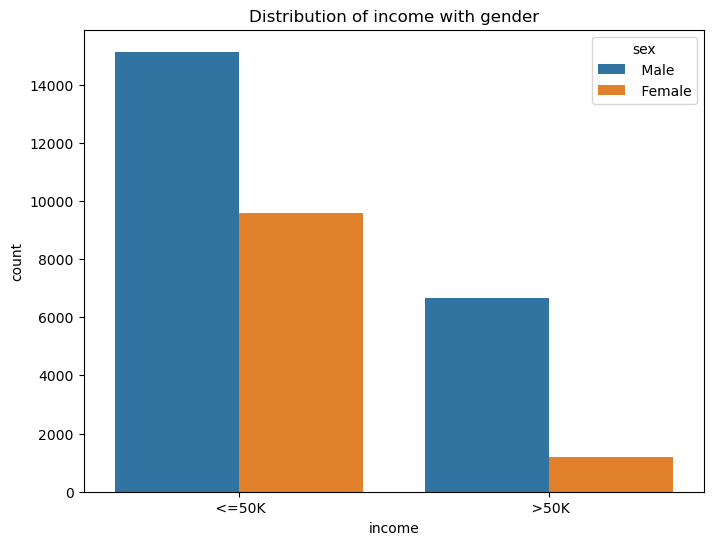

In [19]:
fig,ax = plt.subplots(figsize=(8,6)) #genişlik 8, yükseklik 6
ax = sns.countplot(x="income",data=df, hue="sex") #cinsiyete göre ne kazanıyorlar
ax.set_title("Distribution of income with gender")
plt.show()

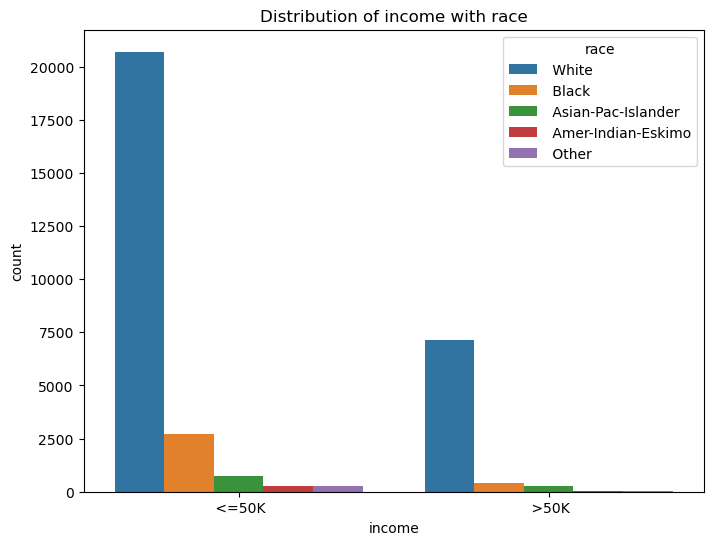

In [20]:
fig,ax = plt.subplots(figsize=(8,6)) #genişlik 8, yükseklik 6
ax = sns.countplot(x="income",data=df, hue="race") #ırkına göre ne kazanıyorlar
ax.set_title("Distribution of income with race")
plt.show()

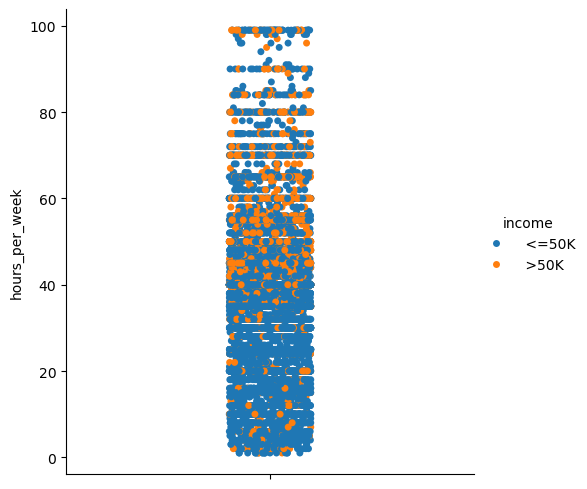

In [21]:
sns.catplot(y=df["hours_per_week"], hue=df["income"])
plt.show()

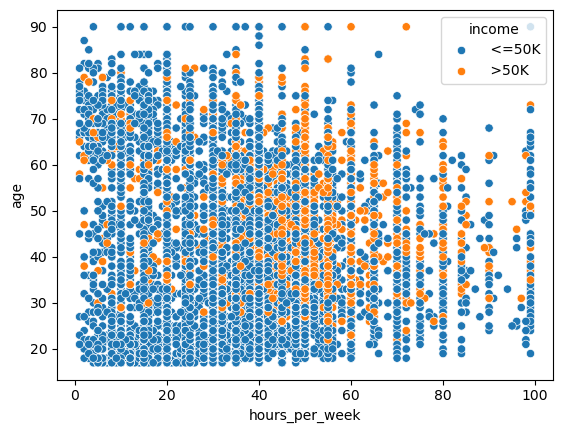

In [22]:
sns.scatterplot(x=df["hours_per_week"], y=df["age"], hue=df["income"])
plt.show()

In [23]:
#filtreleyebiliriz
over_40_hours = df[df["hours_per_week"] > 40]
under_40_hours = df[df["hours_per_week"]<=40]

In [24]:
over_40_hours.shape

(9581, 15)

In [25]:
under_40_hours.shape

(22980, 15)

In [26]:
over_40_hours["income"].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [27]:
under_40_hours["income"].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [28]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [29]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [30]:
df["workclass"] = df["workclass"].replace(" ?",np.nan)

In [31]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [32]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [33]:
df["martial_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [34]:
df["occupation"].unique() #bunda da ? var

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [35]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [36]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [37]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [38]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [39]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [40]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [41]:
df["native_country"].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [42]:
df["native_country"] = df["native_country"].replace(" ?", np.nan)

In [43]:
df["native_country"].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [44]:
df.isnull().sum() #arıtk nan değerler var

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
martial_status       0
occupation        1843
relationship         0
race                 0
sex                  0
captial_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

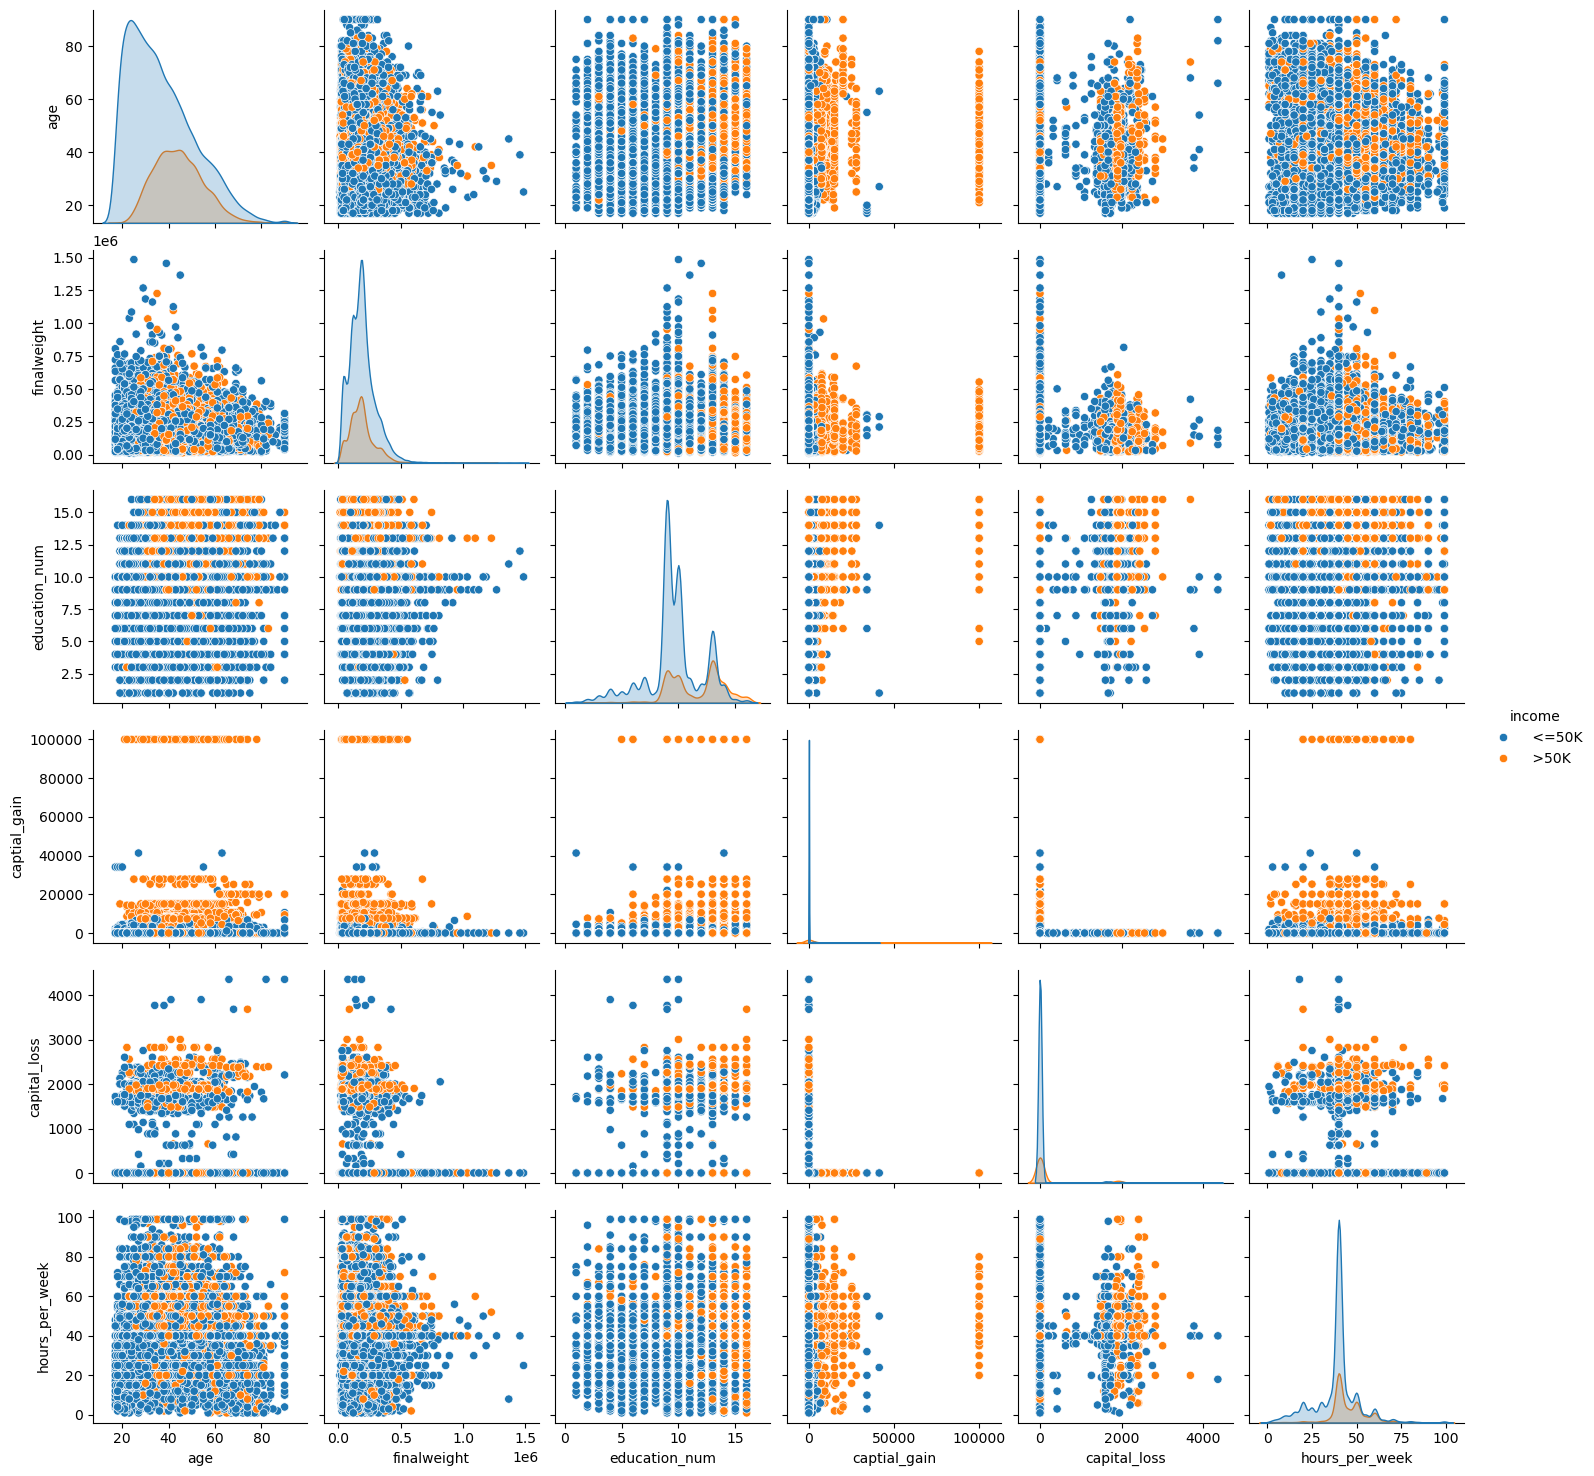

In [45]:
sns.pairplot(df, hue="income")
plt.show()

In [46]:
X = df.drop("income", axis=1)
y = df["income"]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
categorical = [col for col in X_train.columns if X_train[col].dtype == 'O']

In [49]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
martial_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [50]:
X_test[categorical].isnull().sum()

workclass         560
education           0
martial_status      0
occupation        565
relationship        0
race                0
sex                 0
native_country    169
dtype: int64

In [51]:
#Kategorik değerlerde mode imputing yaparız. Yani eksik değerleri (NaN), o sütundaki en sık görülen kategori ile dolduracağız
X_train['workclass'].mode() #yani workclass kolonunda en çok tekrar eden kategori Private'dır.

0     Private
Name: workclass, dtype: object

In [52]:
X_train['workclass'].mode()[0] 

' Private'

In [53]:
for i in [X_train,X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0]) #workclass'ın mod'unu alıp ilk elemanını alır
    i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0]) 
    i["native_country"] = i["native_country"].fillna(X_train["native_country"].mode()[0]) 

In [54]:
X_train[categorical].isnull().sum()

workclass         0
education         0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [55]:
X_test[categorical].isnull().sum()

workclass         0
education         0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

### Encoding

In [56]:
X_train[categorical].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [57]:
df[categorical].nunique() #number of unique

workclass          8
education         16
martial_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [58]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0) #x 50K'dan büyükse, x'i 1 yap, değilse 0 yap
#x.strip() ->> metnin başındaki ve sonundaki boşlukları siler

In [59]:
y_train_binary #artık 1 ve 0'lardan oluşuyor

32098    1
25206    0
23491    1
12367    0
7054     0
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: income, Length: 22792, dtype: int64

In [60]:
target_means = y_train_binary.groupby(X_train["native_country"]).mean() #X_train'in native_country'sine göre grupla ve bunun ortalamasını al

In [61]:
X_train['native_country_encoded'] = X_train["native_country"].map(target_means)
X_train['native_country_encoded'] = X_train["native_country_encoded"].fillna(y_train_binary.mean()) #eğer bir şey boş kalırsa Nan değeri y_train_binary'nin ortalaması ile doldurur



X_test['native_country_encoded'] = X_test["native_country"].map(target_means)
X_test['native_country_encoded'] = X_test["native_country_encoded"].fillna(y_train_binary.mean()) #eğer bir şey boş kalırsa Nan değeri y_train_binary'nin ortalaması ile doldurur


In [62]:
X_train.head()

,age,workclass,finalweight,education,education_num,martial_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,native_country_encoded
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,0.245722
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,0.245722
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0.245722
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,0.041667
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,0.284091


In [63]:
#artık native_country'e ihtiyacımız yok
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [64]:
categorical #native_country dışındakilere de one-hot-encoding yapacağız

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [65]:
one_hot_categories =['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [67]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown="ignore",sparse_output=False),one_hot_categories) #handle_unknown:ignore bilinmeyen bir kolon çıkarsa onu pas geçer
    ], remainder="passthrough" #seçilmeyen sütunları değiştirmeden çıktıya ekler
)
#sparse_output:False --> OneHotEncoder normalde sparse matrix üretir (seyrek matris). Yani çoğu elemanı 0 olan, bellekte daha az yer kaplayan matris türü
#Eğer False dersek, sıkı bir numpy array döndürür yani tüm 0'lar ve 1'ler normal bir tablo (ndarray) olarak tutulur

In [68]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [69]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]])

In [70]:
#Olur da sonradan kolon isimlerine ihityacımız olursa, kolon adlarını alabiliriz
columns = encoder.get_feature_names_out()

In [71]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__martial_status_ Divorced',
       'cat__martial_status_ Married-AF-spouse',
       'cat__martial_status_ Married-civ-spouse',
       'cat__martial_status_ Married-spouse-absent',
       'cat__martial_status_ Never-mar

In [72]:
#Data Frame'e çevirebiliriz
X_train = pd.DataFrame(X_train_enc, columns = columns, index = X_train.index)
X_test = pd.DataFrame(X_test_enc, columns = columns, index = X_test.index)

In [73]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__captial_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,33331.0,14.0,0.0,0.0,40.0,0.245722
19648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,44.0,98466.0,6.0,0.0,0.0,35.0,0.245722
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,23.0,45317.0,10.0,0.0,0.0,40.0,0.245722
10799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,215862.0,16.0,7688.0,0.0,45.0,0.245722


In [74]:
#kolon isimlerini bir kaydedelim
cols = X_train.columns

In [75]:
#Aslında Decision Tree'lerde Scaling yapmaya gerek yok. Ağacın performansını arttırmaz veya azaltmaz.
#Ancak başka algoritmalar da kullanacaksanız (örn Logistic Regression) o zaman Scaling yapabilirsiniz.

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() #Robust Scaler outlierlara daha dayanıklıdır

In [76]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [77]:
#X_train yine numpy dizisine dönecek istersek dataframe'e çevirebiliriz
X_train

array([[ 0. ,  0. ,  0. , ...,  0. ,  4. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -0.4,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  2. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1.6,  0. ]])

In [78]:
X_train = pd.DataFrame(X_train, columns=cols)

In [79]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__captial_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0,0.000000
1,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.55,0.080425,0.000000,0.0,0.0,2.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.40,-0.270650,-0.333333,0.0,0.0,0.0,-0.204055
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,0.210240,-2.000000,0.0,0.0,-3.0,0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.30,-1.210980,1.333333,0.0,0.0,0.0,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.35,-0.665391,-1.333333,0.0,0.0,-1.0,0.000000
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.70,-1.110582,0.000000,0.0,0.0,0.0,0.000000
22790,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,0.317951,2.000000,7688.0,0.0,1.0,0.000000


In [80]:
X_test = pd.DataFrame(X_test, columns=cols)

### Training

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15) #n_estimators kaç tane ağaç olacağıdır
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [83]:
y_pred = rfc.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [85]:
print("Accuracy Score:" , accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))

Accuracy Score: 0.8482956290306071
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.59      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

Confusion matrix: 
 [[6890  517]
 [ 965 1397]]


In [86]:
#100 ağaç ile deneyelim
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)
print("Accuracy Score:" , accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred2))

Accuracy Score: 0.8546422356433616
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.74      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Confusion matrix: 
 [[6876  531]
 [ 889 1473]]


In [88]:
rfc.feature_importances_ #Modelin tahmin yaparken hangi değişkenleri ne kadar kullandığını gösterir.
#RandomForestClassifier modelinin her bir özelliğe verdiği önem skorlarını döndüren bir özelliktir.

array([5.86948083e-03, 5.92819446e-03, 7.71834128e-06, 1.11420821e-02,
       5.47836912e-03, 9.02457989e-03, 4.95195918e-03, 7.28838079e-05,
       1.31307915e-03, 1.75381534e-03, 8.17073623e-04, 2.85750399e-04,
       3.48189224e-04, 1.53961167e-03, 1.07880408e-03, 2.45245699e-03,
       3.06014470e-03, 1.06418670e-02, 2.66503020e-03, 7.14724635e-03,
       8.08808365e-03, 3.28595484e-05, 3.96490471e-03, 5.95817121e-03,
       5.98807638e-03, 2.83499574e-04, 6.18572859e-02, 9.87836968e-04,
       2.63805782e-02, 1.68775100e-03, 1.68465381e-03, 5.59884649e-03,
       2.49965342e-05, 8.37416717e-03, 1.85324301e-02, 3.82127988e-03,
       3.13200568e-03, 4.42128356e-03, 7.54398637e-03, 9.77432120e-05,
       1.39922136e-02, 3.11460587e-03, 7.37494753e-03, 5.13377748e-03,
       5.19738937e-03, 4.48361418e-02, 8.70027923e-03, 1.41561414e-03,
       9.58657802e-03, 4.45130797e-03, 1.07991701e-02, 1.39402872e-03,
       3.35400019e-03, 4.99209219e-03, 8.01672855e-04, 7.03217008e-03,
      

In [91]:
feature_scores = pd.Series(rfc.feature_importances_ , index=X_train.columns).sort_values(ascending=False)

In [93]:
feature_scores #altta kalanlar önemsiz

remainder__finalweight              0.160256
remainder__age                      0.148601
remainder__captial_gain             0.095241
remainder__hours_per_week           0.084614
remainder__education_num            0.071047
                                      ...   
cat__occupation_ Priv-house-serv    0.000098
cat__workclass_ Without-pay         0.000073
cat__education_ Preschool           0.000033
cat__occupation_ Armed-Forces       0.000025
cat__workclass_ Never-worked        0.000008
Length: 65, dtype: float64

In [94]:
feature_scores.tail(10) #bu 10 tane kolon bizim için çok da önemli değil

cat__education_ 12th                      0.000817
cat__race_ Other                          0.000802
cat__education_ 5th-6th                   0.000348
cat__education_ 1st-4th                   0.000286
cat__martial_status_ Married-AF-spouse    0.000283
cat__occupation_ Priv-house-serv          0.000098
cat__workclass_ Without-pay               0.000073
cat__education_ Preschool                 0.000033
cat__occupation_ Armed-Forces             0.000025
cat__workclass_ Never-worked              0.000008
dtype: float64

In [96]:
#Manuel olarak bu 10 kolonu X_train ve X_testten atarak tekrar deneyelim.
X_train = X_train.drop(["cat__education_ 12th","cat__race_ Other","cat__education_ 5th-6th","cat__education_ 1st-4th","cat__martial_status_ Married-AF-spouse",
                        "cat__occupation_ Priv-house-serv","cat__workclass_ Without-pay","cat__education_ Preschool","cat__occupation_ Armed-Forces",
                        "cat__workclass_ Never-worked"],axis=1)

In [97]:
X_test = X_test.drop(["cat__education_ 12th","cat__race_ Other","cat__education_ 5th-6th","cat__education_ 1st-4th","cat__martial_status_ Married-AF-spouse",
                        "cat__occupation_ Priv-house-serv","cat__workclass_ Without-pay","cat__education_ Preschool","cat__occupation_ Armed-Forces",
                        "cat__workclass_ Never-worked"],axis=1)

In [98]:
#şimdi tekrar rfc eğitip skorlara bakalım
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print("Accuracy Score:" , accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred3))

Accuracy Score: 0.8540280479066434
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.63      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Confusion matrix: 
 [[6863  544]
 [ 882 1480]]


### Hyperparameter Tuning

In [104]:
rf_params = {
    "n_estimators" :  [100,200,500,1000],
    "max_depth" : [5,8,10,15,None],
    "max_features" : ["sqrt","log2",5,6,7,8],
    "min_samples_split" : [2,8,15,20]
}

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
rfc = RandomForestClassifier()

In [107]:
rscv = RandomizedSearchCV(estimator = rfc, param_distributions=rf_params, cv=3,n_jobs=-1)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 5, 6,
                                                         7, 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]})

In [108]:
y_pred4 = rscv.predict(X_test)
print("Accuracy Score:" , accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred4))

Accuracy Score: 0.8611935715016891
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7407
        >50K       0.78      0.60      0.67      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769

Confusion matrix: 
 [[7005  402]
 [ 954 1408]]


In [109]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'max_features': 8,
 'max_depth': 15}